## **Оглавление**:

- [Шаг 1. Откроем файлы с данными и изучим общую информацию](#id-section1)<div id='id-section19'/>
- [Вывод](#id-section2)<div id='id-section20'/>


- [Шаг 2. Подготовим данные к анализу](#id-section3)<div id='id-section21'/>
- [Приведем данные к нужным типам](#id-section4) <div id='id-section22'/>
- [Найдем и исправим ошибки в данных](#id-section5) <div id='id-section23'/>
- [Посчитаем для каждого пользователя количество сделанных звонков и израсходованных минут разговора по месяцам](#id-section6) <div id='id-section24'/>
- [Посчитаем для каждого пользователя количество отправленных сообщений по месяцам](#id-section7) <div id='id-section25'/>
- [Посчитаем для каждого пользователя объем израсходованного интернет-трафика по месяцам](#id-section8) <div id='id-section26'/>
- [Посчитаем помесячную выручку с каждого пользователя](#id-section9) <div id='id-section27'/>
- [Вывод](#id-section10)<div id='id-section28'/> 


- [Шаг 3. Проанализируем данные](#id-section11) <div id='id-section29'/>
- [Вывод](#id-section12) <div id='id-section30'/>


- [Шаг 4. Проверим гипотезы](#id-section13) <div id='id-section31'/>
- [Гипотеза о том, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различается](#id-section14) <div id='id-section32'/>
- [Вывод](#id-section15) <div id='id-section33'/>
- [Гипотеза о том, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов](#id-section16) <div id='id-section34'/>
- [Вывод](#id-section17) <div id='id-section35'/>


- [Шаг 5. Общий вывод](#id-section18) <div id='id-section36'/>

<div id='id-section1'/>

## [Шаг 1. Откроем файлы с данными и изучим общую информацию](#id-section19)

Методы `head()` и `tail()` применять не будем, потому что Jupyter и так выведет на экран первые и последние 5 строк из таблиц.

In [1]:
from IPython.display import display

import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

df_users = pd.read_csv('/datasets/users.csv')
df_calls = pd.read_csv('/datasets/calls.csv')
df_messages = pd.read_csv('/datasets/messages.csv')
df_internet = pd.read_csv('/datasets/internet.csv')
df_tariffs = pd.read_csv('/datasets/tariffs.csv')

display(df_users, df_calls, df_messages, df_internet, df_tariffs)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Посмотрим, какие типы данных хранятся в каждой таблице, воспользуемся методом `info()`. Для автоматизации напишем цикл `for`.

In [2]:
tables = [df_users, df_calls, df_messages, df_internet, df_tariffs]
for table in tables:
    table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory

<div id='id-section2'/>

### [Вывод](#id-section20)

Таблицы `df_calls`, `df_messages`, `df_internet` - это объемные массивы данных, в них хранится до 202 тыс. строк. 

В 4 таблицах есть общий столбец `user_id`. Однако в таблице `df_users` есть столбец с названием тарифа `tariff`, а в таблице `df_tariffs` такой же столбец носит название `tariff_name`. Имеет смысл привести эти два столбца к одинаковому названию.

В таблице `df_internet` есть столбец `Unnamed: 0`, который повторяет индексацию, его можно удалить.

В столбцах присутствуют типы данных `int64` (для количественных переменных, например: идентификатор пользователя, возраст, характеристики тарифов из таблицы `df_tariffs`), `float64` (для количественных переменных, например: продолжительность звонка, количество использованного трафика), `object` (для категориальных переменных: фамилия, имя, город, название тарифа).

Кроме того, мы заметили, что переменные `churn_date`, `reg_date`, `call_date`, `message_date`, `session_date` должны иметь тип данных `datetime` (вместо `object`).

В таблице `df_users` в столбце `churn_date` много пропущенных значений, которые означают, что тариф ещё действовал на момент выгрузки данных (то есть дата прекращения пользования тарифом отсутствует).

В таблице `df_calls` в столбце `duration` есть нулевые значения, это могут быть пропущенные звонки. Также в таблице `df_internet` в столбце `mb_used` есть нули, возможно, это значит, что пользователь не пользовался интернетом в конкретную дату.

<div id='id-section3'/>

## [Шаг 2. Подготовим данные к анализу](#id-section21)

<div id='id-section4'/>

### [Приведем данные к нужным типам](#id-section22)

Переменные `churn_date`, `reg_date`, `call_date`, `message_date`, `session_date` должны иметь тип данных `datetime` (вместо `object`). Используем метод `to_datetime()`. Также надо добавить дополнительный столбец, в котором будет содержаться только месяц (метод `dt.month`). 

Чтобы применить эти методы ко всем таблицам сразу, создадим словарь с параметрами (название таблицы и столбца), функцию и запустим функцию через цикл `for` для каждого параметра.

In [3]:
dfs_columns = [
    {
        'df': df_users,
        'column': 'churn_date'
    },
    {
        'df': df_users,
        'column': 'reg_date'
    },
    {
       'df': df_calls,
        'column': 'call_date'
    },
    {
       'df': df_messages,
        'column': 'message_date'
    },
    {
       'df': df_internet,
        'column': 'session_date'
    }
]

def to_datetime_and_add_month(dfs_columns):
    df = dfs_columns.get('df')
    column = dfs_columns.get('column')
    df[column] = pd.to_datetime(df[column], format='%Y-%m-%dT%H:%M:%S')
    df['month'] = df[column].dt.month

for df_column in dfs_columns:
    to_datetime_and_add_month(df_column)

<div id='id-section5'/>

### [Найдем и исправим ошибки в данных](#id-section23)

В таблице `df_users` есть столбец с названием тарифа `tariff`, а в таблице `df_tariffs` такой же столбец носит название `tariff_name`. Имеет смысл привести эти два столбца к одинаковому названию.

Переименуем столбец в таблице `df_tariffs` методом `rename()` и проверим.

In [4]:
df_tariffs = df_tariffs.rename(columns={'tariff_name': 'tariff'})
display(df_tariffs)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


В таблице `df_internet` есть столбец `Unnamed: 0`, который повторяет индексацию, его можно удалить методом `drop()`. Сразу выполним проверку.

In [5]:
df_internet = df_internet.drop('Unnamed: 0',axis=1)
display(df_internet.head())

,id,mb_used,session_date,user_id,month
0,1000_0,112.95,2018-11-25,1000,11
1,1000_1,1052.81,2018-09-07,1000,9
2,1000_2,1197.26,2018-06-25,1000,6
3,1000_3,550.27,2018-08-22,1000,8
4,1000_4,302.56,2018-09-24,1000,9


В таблице `df_calls` в столбце `duration` встречаются нулевые значения, то есть длительность многих звонков — 0.0 минут. Это могут быть пропущенные звонки. Также в таблице `df_internet` в столбце `mb_used` есть нули, возможно, это значит, что пользователь не пользовался интернетом в конкретную дату.

В случае, если мы **не** станем обрабатывать ли эти нулевые значения, то впоследствии при создании сводных таблиц для количества сделанных звонков и израсходованных минут разговора по месяцам и объема израсходованного интернет-трафика по месяцам произойдет искажение этих характеристик. 

Мы решили удалить нулевые значения в столбцах, так как:
- это поможет отсеять не состоявшиеся звонки и интернет-сессии;
- сводные таблицы для количества сделанных звонков и израсходованных минут разговора по месяцам и объема израсходованного интернет-трафика по месяцам будут рассчитаны только для тех звонков и интернет-сессий, которые состоялись, без искажений.

Используем метод `query()`. 

In [6]:
df_calls = df_calls.query('duration != 0.0')
df_internet = df_internet.query('mb_used != 0.0')

Нам известно, что «Мегалайн» всегда округляет вверх значения минут и мегабайтов (например, если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута). Поэтому округлим вверх значения в столбцах `duration` и `mb_used` при помощи функции `math.ceil()` из библиотеки `math`. Применим функцию к каждому столбцу методом `apply()` через `lambda`.

In [7]:
df_calls['duration'] = df_calls['duration'].apply(lambda x: math.ceil(x))
df_internet['mb_used'] = df_internet['mb_used'].apply(lambda x: math.ceil(x))


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<div id='id-section6'/>

### [Посчитаем для каждого пользователя количество сделанных звонков и израсходованных минут разговора по месяцам](#id-section24)

Создадим из `df_calls` сводную таблицу `calls`, в которой данные будут сгруппированы по пользователям и месяцам, а значения будут состоять из количества значений в столбце `duration` и суммы этих значений.

Также для удобства переименуем столбцы в сводной таблице и сделаем их все на одном уровне. 

In [8]:
calls = df_calls.pivot_table(index = ['user_id', 'month'], values = 'duration', aggfunc = ['count', 'sum'])
calls = calls.reset_index()
calls.columns = ['user_id', 'month', 'calls_count', 'calls_sum']

display(calls.head())

,user_id,month,calls_count,calls_sum
0,1000,5,17,159
1,1000,6,28,172
2,1000,7,41,340
3,1000,8,42,408
4,1000,9,46,466


<div id='id-section7'/>

### [Посчитаем для каждого пользователя количество отправленных сообщений по месяцам](#id-section25)


Создадим из `df_messages` сводную таблицу `messages`, в которой данные будут сгруппированы по пользователям и месяцам, а значения будут состоять из количества значений в столбце `id` (уникальный номер сообщения).

Также для удобства сделаем все названия столбцов на одном уровне и переименуем столбец `id` в `msg_count` методом `rename()`.

In [9]:
messages = df_messages.pivot_table(index = ['user_id', 'month'], values = 'id', aggfunc = 'count')
messages = messages.reset_index().rename(columns = {'id': 'msg_count'})
display(messages.head())

,user_id,month,msg_count
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


<div id='id-section8'/>

### [Посчитаем для каждого пользователя объем израсходованного интернет-трафика по месяцам](#id-section26)


Создадим из `df_internet` сводную таблицу `internet`, в которой данные будут сгруппированы по пользователям и месяцам, а значения будут состоять из суммы значений в столбце `mb_used`.

Также для удобства сделаем все названия столбцов на одном уровне методом `reset_index()`. Переименование столбцов не требуется.

In [10]:
internet = df_internet.pivot_table(index = ['user_id', 'month'], values = 'mb_used', aggfunc = 'sum')
internet = internet.reset_index()
display(internet.head())

,user_id,month,mb_used
0,1000,5,2256
1,1000,6,23257
2,1000,7,14016
3,1000,8,14070
4,1000,9,14581


Объединим все получившиеся сводные таблицы в одну - `user_details`. Объединение делаем методом `merge()` по столбцам `user_id` и `month`, тип объединения задаем `outer`, чтобы несовпадающие данные не выбрасывались, а сохранялись. 

Сначала к таблице `internet` присоединяем `messages`, а потом к результату присоединяем `calls`. Выведем на экран первые и последние 5 строк.

In [11]:
user_details = internet.merge(messages, on = ['user_id', 'month'], how = 'outer')\
.merge(calls, on = ['user_id', 'month'], how = 'outer')
display(user_details)

,user_id,month,mb_used,msg_count,calls_count,calls_sum
0,1000,5,2256.0,22.0,17.0,159.0
1,1000,6,23257.0,60.0,28.0,172.0
2,1000,7,14016.0,75.0,41.0,340.0
3,1000,8,14070.0,81.0,42.0,408.0
4,1000,9,14581.0,57.0,46.0,466.0
...,...,...,...,...,...,...
3209,1273,12,NaN,39.0,38.0,260.0
3210,1365,10,NaN,1.0,5.0,43.0
3211,1377,2,NaN,2.0,20.0,179.0
3212,1392,2,NaN,3.0,2.0,13.0


Для того, чтобы присоединить к `user_details` таблицу `df_users`, мы должны выбросить из нее столбцы, которые не пригодятся для дальнейшего анализа. Мы решили не оставлять такие столбцы, как имя, фамилия, возраст пользователей. 

Соответственно, оставляем только столбцы `user_id`, `tariff`, `reg_date`, `churn_date`, `city`, сохраняем это в сокращенную таблицу `short_users`.

In [12]:
short_users = df_users[['user_id', 'tariff', 'reg_date', 'churn_date', 'city']]

Присоединяем к `user_details` таблицу `short_users` по столбцу `user_id`, и к результату присоединяем таблицу с тарифами `df_tariffs` по столбцу с названием тарифов `tariff`. 

Выведем на экран `user_details`.

In [13]:
user_details = user_details.merge(short_users, on = ['user_id'], how = 'left')\
.merge(df_tariffs, on = ['tariff'], how = 'left')
display(user_details)

,user_id,month,mb_used,msg_count,calls_count,calls_sum,tariff,reg_date,churn_date,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,2256.0,22.0,17.0,159.0,ultra,2018-05-25,NaT,Краснодар,1000,30720,3000,1950,150,1,1
1,1000,6,23257.0,60.0,28.0,172.0,ultra,2018-05-25,NaT,Краснодар,1000,30720,3000,1950,150,1,1
2,1000,7,14016.0,75.0,41.0,340.0,ultra,2018-05-25,NaT,Краснодар,1000,30720,3000,1950,150,1,1
3,1000,8,14070.0,81.0,42.0,408.0,ultra,2018-05-25,NaT,Краснодар,1000,30720,3000,1950,150,1,1
4,1000,9,14581.0,57.0,46.0,466.0,ultra,2018-05-25,NaT,Краснодар,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1273,12,NaN,39.0,38.0,260.0,ultra,2018-05-15,NaT,Курган,1000,30720,3000,1950,150,1,1
3210,1365,10,NaN,1.0,5.0,43.0,smart,2018-10-31,NaT,Ростов-на-Дону,50,15360,500,550,200,3,3
3211,1377,2,NaN,2.0,20.0,179.0,ultra,2018-02-25,NaT,Брянск,1000,30720,3000,1950,150,1,1
3212,1392,2,NaN,3.0,2.0,13.0,ultra,2018-02-27,2018-09-27,Челябинск,1000,30720,3000,1950,150,1,1


Мы видим, что в хвосте таблицы встречаются пропущенные значения, поэтому пройдем по столбцам `mb_used`, `msg_count`, `calls_count`, `calls_sum` и заполним пропуски на нули методом `fillna()`. 

In [14]:
user_details[['mb_used', 'msg_count', 'calls_count', 'calls_sum']] \
= user_details[['mb_used', 'msg_count', 'calls_count', 'calls_sum']].fillna(0)

<div id='id-section9'/>

### [Посчитаем помесячную выручку с каждого пользователя](#id-section27)

Создадим функцию, которая считает разность из суммарного количества звонков, сообщений и интернет-трафика (`calls_sum`, `msg_count`, `mb_used`) и бесплатного лимита, включенного в тарифный план (`minutes_included`, `messages_included`, `mb_per_month_included`). 

В случае, если остаток больше 0 (то есть пользователь израсходовал больше, чем предусмотрено тарифным планом), умножим его на значение из тарифного плана (`rub_per_minute`, `rub_per_message`, `rub_per_gb`); а в случае, если остаток меньше 0 (пользователь израсходовал меньше, чем предусмотрено тарифным планом), то значение из тарифного плана умножается на 0. 

Обращаем внимание, что мегабайты надо переводить в гигабайты, потому что по тарифу плата списывается именно за гигабайты. Кроме того, если остаток по использованным гигабайтам больше 0, то это значение надо округлить вверх методом `math.ceil()`, и только затем умножить на значение из тарифного плана `rub_per_gb`.

К получившимся величинам прибавим абонентскую плату `rub_monthly_fee`, соответствующую тарифному плану.

In [15]:
def money(row):
    minutes = row['calls_sum'] - row['minutes_included']
    if minutes < 0:
        minutes = 0    
    sms = row['msg_count'] - row['messages_included']
    if sms < 0:
        sms = 0
    mb = row['mb_used'] - row['mb_per_month_included']
    gb = mb / 1024
    if gb < 0:
        gb = 0
    else:
        gb = math.ceil(gb)
    fee = row['rub_monthly_fee'] + row['rub_per_gb'] * gb + row['rub_per_message'] * sms + row['rub_per_minute'] * minutes
    return fee

В таблице `user_details` создадим новый столбец `fee`, в котором будет содержаться помесячная выручка, посчитанная функцией `money`. Применим метод `apply()`.

In [16]:
user_details['fee'] = user_details.apply(money, axis=1)

После всех вычислений таблица `user_details` оказалась перегружена столбцами. Мы должны убрать лишние столбцы, которые для анализа больше не пригодятся. Это те столбцы, в которых содержатся условия тарифного плана. 

Для удобства вызовем список всех столбцов, скопируем нужные и переопределим переменные. Выведем сокращенную таблицу `user_details` на экран.

In [17]:
user_details.columns

Index(['user_id', 'month', 'mb_used', 'msg_count', 'calls_count', 'calls_sum',
       'tariff', 'reg_date', 'churn_date', 'city', 'messages_included',
       'mb_per_month_included', 'minutes_included', 'rub_monthly_fee',
       'rub_per_gb', 'rub_per_message', 'rub_per_minute', 'fee'],
      dtype='object')

In [18]:
user_details = user_details[['user_id', 'month', 'mb_used', 'msg_count', 'calls_count', 'calls_sum',
       'tariff', 'reg_date', 'churn_date', 'city', 'fee']]

display(user_details.head())

,user_id,month,mb_used,msg_count,calls_count,calls_sum,tariff,reg_date,churn_date,city,fee
0,1000,5,2256.0,22.0,17.0,159.0,ultra,2018-05-25,NaT,Краснодар,1950.0
1,1000,6,23257.0,60.0,28.0,172.0,ultra,2018-05-25,NaT,Краснодар,1950.0
2,1000,7,14016.0,75.0,41.0,340.0,ultra,2018-05-25,NaT,Краснодар,1950.0
3,1000,8,14070.0,81.0,42.0,408.0,ultra,2018-05-25,NaT,Краснодар,1950.0
4,1000,9,14581.0,57.0,46.0,466.0,ultra,2018-05-25,NaT,Краснодар,1950.0


<div id='id-section10'/>

### [Вывод](#id-section28)

Мы подготовили данные к дальнейшему анализу, привели к типу `datetime`, выделили столбцы с месяцами, переименовами столбцы, удалили нулевые значения перед тем, как создавать сводные таблицы.

Также мы посчитали для каждого пользователя:
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя.

Также мы создали таблицу `user_details`, которая содержит все посчитанные нами переменные, а также включает в себя необходимые переменные из изначальных данных (название тарифа, дата регистрации пользователя, город). 

<div id='id-section11'/>

## [Шаг 3. Проанализируем данные](#id-section29)

Опишем поведение клиентов оператора, исходя из выборки.

Для того, чтобы понять, сколько минут разговора, сообщений и какой объем интернет-трафика требуется пользователям каждого тарифа в месяц, посчитаем среднее количество, дисперсию и стандартное отклонение, а также построим гистограммы распределения величин.

Выделим в словари уникальные параметры для расчетов и построения гистограмм - названия столбцов и заголовки для гистограмм. Параметры `bins` и `range` прописывать не будем, они будут рассчитаны автоматически при построении каждой гистограммы.

Создадим функцию, которая будет учитывать параметры и таблицу с данными `user_details`. Внутри функции сформируем 2 среза данных - по тарифам `ultra` и `smart`. По каждому тарифу функция будет считать:
- среднее значение по столбцу методом `mean()`,
- дисперсию методом `np.var()` из библиотеки `numpy`,
- стандартное отклонение методом `np.sqrt()` из дисперсии,
- все эти величины выведет на экран в понятном виде,
- построит гистограммы по каждому тарифу на одном графике методом `plot` из библиотеки `matplotlib`.

Для каждого параметра запустим функцию циклом `for`.

'calls_sum'

'cреднее значение'

'ultra: 526.6233502538071'

'smart: 417.9349484073576'

'дисперсия'

'ultra: 100873.63339730098'

'smart: 36219.31578434428'

'ст. отклонение'

'ultra: 317.6060978591264'

'smart: 190.31372988921288'

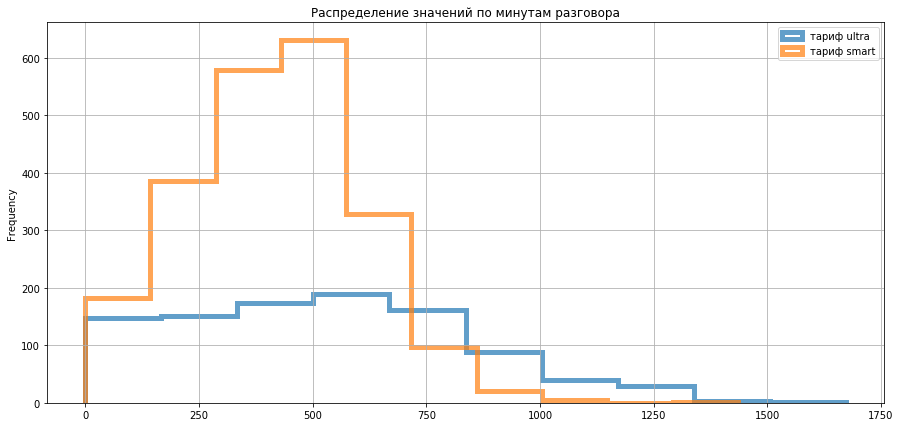

'msg_count'

'cреднее значение'

'ultra: 49.36345177664975'

'smart: 33.384028712427096'

'дисперсия'

'ultra: 2285.2661425446736'

'smart: 796.8129584480083'

'ст. отклонение'

'ultra: 47.804457350174715'

'smart: 28.22787555676141'

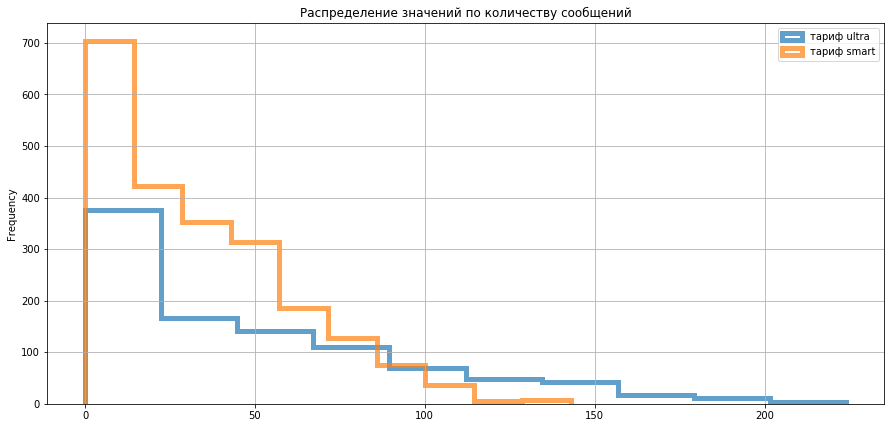

'mb_used'

'cреднее значение'

'ultra: 19486.90152284264'

'smart: 16229.188425302826'

'дисперсия'

'ultra: 101935621.04821923'

'smart: 34545911.12695753'

'ст. отклонение'

'ultra: 10096.317202238608'

'smart: 5877.576977544193'

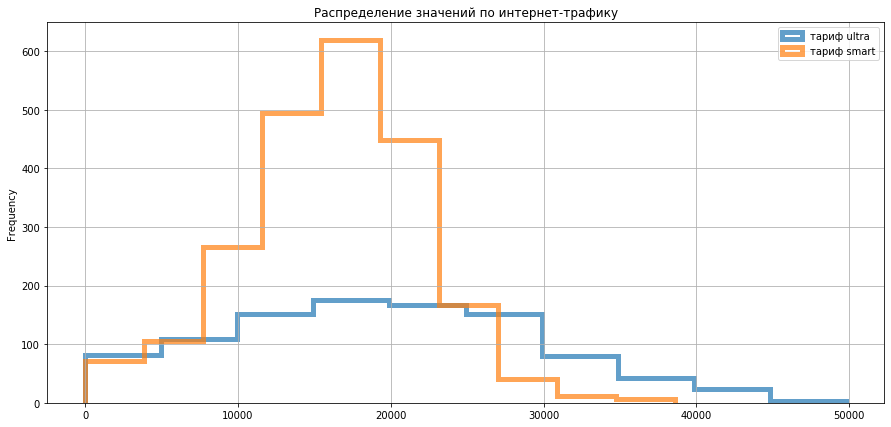

In [19]:
parameters = [
    {
        'column_name': 'calls_sum',
        'title': 'Распределение значений по минутам разговора'
    },
    {
        'column_name': 'msg_count',
        'title': 'Распределение значений по количеству сообщений'
    },
    {
        'column_name': 'mb_used',
        'title': 'Распределение значений по интернет-трафику'
    }
]


def clients_behaviour(parameters, user_details):
    column_name = parameters.get('column_name')
    
    ultra = user_details.query('tariff == "ultra"')
    smart = user_details.query('tariff == "smart"')
    
    mean_ultra = ultra[column_name].mean()
    mean_smart = smart[column_name].mean()
    variance_ultra = np.var(ultra[column_name], ddof=1)
    variance_smart = np.var(smart[column_name], ddof=1)
    st_deviation_ultra = np.sqrt(variance_ultra)
    st_deviation_smart = np.sqrt(variance_smart)
    display(column_name, 'cреднее значение', 'ultra: ' + str(mean_ultra), 'smart: ' + str(mean_smart),\
            'дисперсия', 'ultra: ' + str(variance_ultra), 'smart: ' + str(variance_smart), \
            'ст. отклонение', 'ultra: ' + str(st_deviation_ultra), 'smart: ' + str(st_deviation_smart))
    
    ax = ultra[column_name].plot(kind='hist', histtype='step', linewidth=5, alpha=0.7, label='тариф ultra', legend=True)
    smart[column_name].plot(kind='hist', histtype='step', linewidth=5, alpha=0.7, label='тариф smart', ax=ax, grid=True, \
                                                              legend=True, title = parameters.get('title'), figsize = (15,7)) 
    plt.show()

for parameter in parameters:
    clients_behaviour(parameter, user_details)

<div id='id-section12'/>

### [Вывод](#id-section30)

Пользователи тарифа «Ультра» используют в среднем больше **минут разговора**, чем пользователи «Смарт» (526 против 417). Это объясняется тем, что в их тарифный план включено 3000 минут, а в «Смарт» только 500. На гистограмме видно, что пользователи «Смарт», в основном, немного выходят за рамки своего тарифного плана, а число тех, кто сильно превышает лимит в 500 минут, сокращается (но не так уж и резко). 

Пользователи «Ультра» в основном говорят до 800 минут в месяц, а 1000 очень редко кто использует. Из этого можно сделать вывод о том, что пользователям «Смарт» не всегда хватает того количества, которое у них предусмотрено тарифом, а пользователи тарифа «Ультра», наоборот, не могут до конца исчерпать тот лимит, который им предоставляется.

Большинство пользователей обоих тарифов отправляют по 15-20 **сообщений** в месяц, что видно на гистограмме. Это свидетельствует о том, что смс-сообщения как вид коммуникации постепенно теряет свою популярность. 

Пользователи «Смарт» в среднем отправляют меньше сообщений, чем пользователи «Ультра» (33 против 49) - возможно, из-за того, что в их тариф включено лишь 50 сообщений, они чувствуют это ограничение, а вот у «Ультра» есть лимит в 1000 сообщений, поэтому его пользователи не ограничивают себя. Снова повторяется тенденция того, что пользователи тарифа «Ультра» не могут использовать свой лимит до конца, а вот некоторые пользователи «Смарт» превышают ограничение в 50 сообщений (иногда отправляют до 150 сообщений, превышая свой лимит в 3 раза).

Пользователи тарифа «Смарт» имеют ограничение в 15 гб (= 15360 мб) **интернет-трафика** в месяц. На гистограмме видно, что большинство пользователей превышают этот лимит и тратят от 15 до 19 гб в месяц, что также подтверждается средним значением 15.84 гб (= 16229 мб). Также велико число пользователей «Смарт», которые тратят больше 20 гб в месяц, а некоторые доходят и до 39 гб.

Пользователи тарифа «Ультра» имеют в запасе 30 гб (= 30720 мб) интернет-трафика в месяц. Судя по среднему значению, они укладываются в этот лимит и используют 19 гб (= 19486 мб). На гистограмме видно, что большинство пользователей не превышает лимит в 30 гб, но есть и те, кто тратит больше, даже до 50 гб. 

Мы можем сделать вывод, что пользователи «Ультра», которые обычно не могут исчерпать лимиты по количеству минут и сообщений, в случае с интернет-трафиком выходят за рамки лимита и тратят больше порогового значения.

<div id='id-section13'/>

## [Шаг 4. Проверим гипотезы](#id-section31)

<div id='id-section14'/>

### [Гипотеза о том, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различается](#id-section32)

В связи с тем, что пользователи «Ультра» и «Смарт» - это разные люди, мы не можем сказать, что перед нами зависимые (парные) выборки. Следовательно, нам нужно проверить гипотезу о равенстве средних для двух разных выборок.

- **Гипотезу H₀ сформулируем так:** средние выручки пользователей тарифов «Ультра» и «Смарт» равны (то есть не различаются).
- **Гипотеза H₁:** средние выручки пользователей тарифов «Ультра» и «Смарт» различаются.

Для проверки гипотезы **H₀** мы проведем t-тест методом `scipy.stats.ttest_ind()` из библиотеки `scipy.stats`, куда передадим два среза данных с выручкой по тарифам «Ультра» и «Смарт». Параметр `equal_var` по умолчанию будет задан как `True`, чтобы дисперсия каждой выборки была оценена по объединенному датасету из двух выборок.

**Критический уровень статистической значимости** зададим значением 0.05 (5%), так как мы доверяем этому общепринятому пороговому значению. 

- Если наблюдаемое на выборках значение `pvalue` попадет в эту зону, у нас будет основание отвергнуть нулевую гипотезу.

- Если значение `pvalue` попадет в зону «Не получилось отвергнуть нулевую гипотезу», то оснований отвергать нулевую гипотезу нет. Будем считать, что эмпирически полученные данные не противоречат H₀.

In [20]:
ultra_fee = user_details.query('tariff == "ultra"')['fee']
smart_fee = user_details.query('tariff == "smart"')['fee']

alpha = 0.05 

results = st.ttest_ind(ultra_fee, smart_fee)

display('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    display('Отвергаем нулевую гипотезу')
else:
    display('Не получилось отвергнуть нулевую гипотезу') 


'p-значение:'

2.9776448000521676e-158

'Отвергаем нулевую гипотезу'

<div id='id-section15'/>

### [Вывод](#id-section33)

- Полученное значение `pvalue` дает нам основание **отвергнуть гипотезу H₀** о равенстве средней выручки пользователей тарифов «Ультра» и «Смарт». 
- Следовательно, эмпирически полученные данные **не противоречат гипотезе H₁**, и средние выручки пользователей тарифов «Ультра» и «Смарт» все-таки различаются (что логично, ведь даже абонентская плата для пользователей «Смарт» составляет 550 руб. в месяц, а у «Ультра» 1950 руб.).

<div id='id-section16'/>

### [Гипотеза о том, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов](#id-section34)

В связи с тем, что пользователи из Москвы и пользователи из других регионов не связаны друг с другом, мы снова проверим гипотезу о равенстве средних для двух разных выборок.

- **Гипотезу H₀ сформулируем так:** средние выручки пользователей из Москвы и других регионов равны (то есть не отличаются).
- **Гипотеза H₁:** средние выручки пользователей из Москвы и других регионов отличаются.

Для проверки гипотезы **H₀** мы снова проведем t-тест методом `scipy.stats.ttest_ind()` из библиотеки `scipy.stats`, куда передадим два среза данных с выручкой по пользователям из Москвы и других регионов. Параметр `equal_var` по умолчанию будет задан как `True`, чтобы дисперсия каждой выборки была оценена по объединенному датасету из двух выборок.

**Критический уровень статистической значимости** зададим значением 0.05 (5%), так как мы доверяем этому общепринятому пороговому значению. 

- Если наблюдаемое на выборках значение `pvalue` попадет в эту зону, у нас будет основание отвергнуть нулевую гипотезу.

- Если значение `pvalue` попадет в зону «Не получилось отвергнуть нулевую гипотезу», то оснований отвергать нулевую гипотезу нет. Будем считать, что эмпирически полученные данные не противоречат H₀.

In [21]:
moscow_fee = user_details.query('city == "Москва"')['fee']
regions_fee = user_details.query('city != "Москва"')['fee']

alpha = 0.05 

results = st.ttest_ind(moscow_fee, regions_fee)

display('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    display('Отвергаем нулевую гипотезу')
else:
    display('Не получилось отвергнуть нулевую гипотезу')

'p-значение:'

0.531666503831252

'Не получилось отвергнуть нулевую гипотезу'

<div id='id-section17'/>

### [Вывод](#id-section35)

- Судя по полученному значению `pvalue` (0.53), это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними выручками.
- Таким образом, эмпирически полученные данные **не противоречат гипотезе H₀**, и мы можем считать, что средние выручки пользователей из Москвы и других регионов не отличаются.

<div id='id-section18'/>

## [Шаг 5. Общий вывод](#id-section36)

Пользователи тарифа «Ультра» используют в среднем больше минут разговора, сообщений и интернет-трафика в месяц, чем пользователи «Смарт». Это объясняется тем, что их тарифный план позволяет им не чувствовать ограничений. При этом, если дело касается минут и сообщений, пользователи «Ультра» не могут до конца исчерпать тот лимит, который им предоставляется. Таким образом, они платят за то, что не используют, что выгодно оператору связи, но не выгодно клиентам.

Пользователи «Смарт», наоборот, используют предоставляемый им лимит до конца и даже иногда выходят за рамки своего тарифного плана, превышая лимиты (и внося дополнительную плату за превышение).

Учитывая тот факт, что вся коммуникация, в том числе звонки и сообщения, постепенно уходят в интернет, пользователям обоих тарифов не всегда хватает предоставляемого интернет-трафика, они выходят за рамки лимита и тратят больше порогового значения. Особенно часто превышение заметно у пользователей «Смарт», потому что в их тарифный план включено меньше интернет-трафика, чем у «Ультра». 

Проверка гипотез показала, что средние выручки пользователей тарифов «Ультра» и «Смарт» различаются (что логично, ведь даже абонентская плата для пользователей «Смарт» составляет 550 руб. в месяц, а у «Ультра» 1950 руб.). И хотя пользователи «Смарт» вносят дополнительную плату за частое превышение лимитов, это не равно той сумме, которую и так каждый месяц платят пользователи «Ультра».

Также мы можем считать, что средние выручки пользователей из Москвы и других регионов не отличаются. Дело в том, что для Москвы и регионов оператор назначил одинаковую плату за тарифы, поэтому пользователи везде платят в среднем одинаково.